In [4]:
!python --version

Python 3.10.6


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!nvidia-smi

Thu Jul 27 05:32:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import torch
torch.cuda.is_available()

True

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.models import resnet50

In [9]:
# Hyperparameters
batch_size = 64
num_epochs = 20
learning_rate = 0.001

In [10]:
# Load Fashion MNIST dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB with three channels
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [11]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
a = next(iter(train_loader))
a[0].size()

100%|██████████| 26421880/26421880 [00:01<00:00, 17356859.71it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299959.01it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5619279.49it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6304314.45it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



torch.Size([64, 3, 224, 224])

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
model = resnet50(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 132MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.to(device)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
error = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch 1, Loss: 0.1846, Train Accuracy: 93.27%
Epoch 2, Loss: 0.1620, Train Accuracy: 94.12%
Epoch 3, Loss: 0.1463, Train Accuracy: 94.69%
Epoch 4, Loss: 0.1272, Train Accuracy: 95.36%
Epoch 5, Loss: 0.1108, Train Accuracy: 96.09%
Epoch 6, Loss: 0.0923, Train Accuracy: 96.54%
Epoch 7, Loss: 0.0779, Train Accuracy: 97.16%
Epoch 8, Loss: 0.0642, Train Accuracy: 97.61%
Epoch 9, Loss: 0.0554, Train Accuracy: 97.98%
Epoch 10, Loss: 0.0440, Train Accuracy: 98.39%
Epoch 11, Loss: 0.0375, Train Accuracy: 98.61%
Epoch 12, Loss: 0.0320, Train Accuracy: 98.86%
Epoch 13, Loss: 0.0305, Train Accuracy: 98.86%
Epoch 14, Loss: 0.0247, Train Accuracy: 99.12%
Epoch 15, Loss: 0.0259, Train Accuracy: 99.08%
Epoch 16, Loss: 0.0211, Train Accuracy: 99.26%
Epoch 17, Loss: 0.0230, Train Accuracy: 99.18%
Epoch 18, Loss: 0.0209, Train Accuracy: 99.26%
Epoch 19, Loss: 0.0214, Train Accuracy: 99.24%
Epoch 20, Loss: 0.0154, Train Accuracy: 99.46%
Finished Training


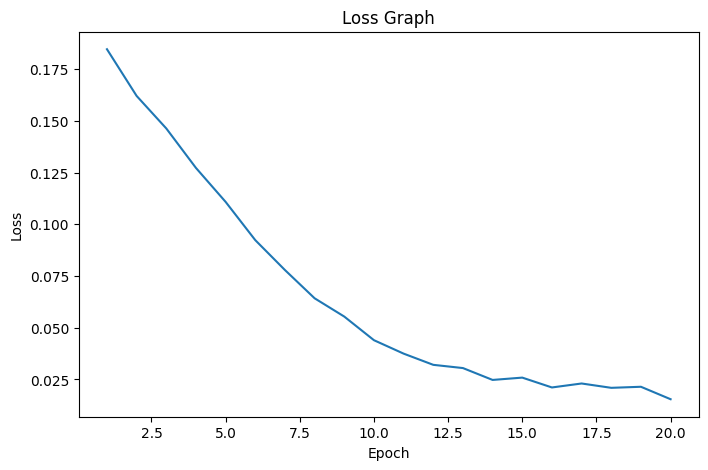

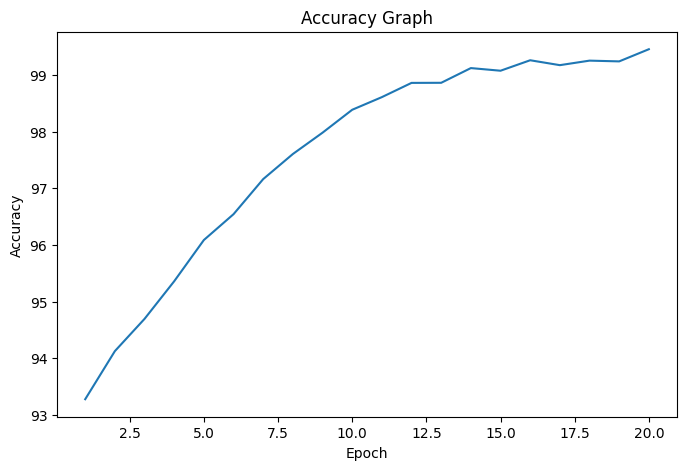

In [17]:
import matplotlib.pyplot as plt

# Training loop

train_losses = []
train_accuracy = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(100 * correct_train / total_train)

    print(f"Epoch {epoch + 1}, Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.2f}%")

print("Finished Training")

# Plot loss graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()

# Plot accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.show()








In [18]:
all_predictions = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [21]:
from sklearn.metrics import classification_report

# Convert the lists to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Create a classification report
report = classification_report(all_labels, all_predictions)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.91      0.90      1000
           3       0.94      0.93      0.93      1000
           4       0.90      0.92      0.91      1000
           5       0.99      0.98      0.99      1000
           6       0.83      0.77      0.80      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

Confusion Matrix:
[[895   0  32  12   3   1  56   0   1   0]
 [  1 990   1   7   0   0   0   0   1   0]
 [ 15   1 914   3  39   0  27   0   1   0]
 [ 14   2  13 929  17   0  24   0   0   1]
 [  0   0  19  15 920   0  45   0   1   0]
 [  0   0   0   0   0 985   0  10   0   5]
 [108   2  54  20  44   0 767   0   5   0]
 [  0   0   0   0   0   1   0 988   0  11]
 [  1   0   3   2   2   2   1   0 989   0]
 [  0   0   0   0   0   2   1  37   0 960]]


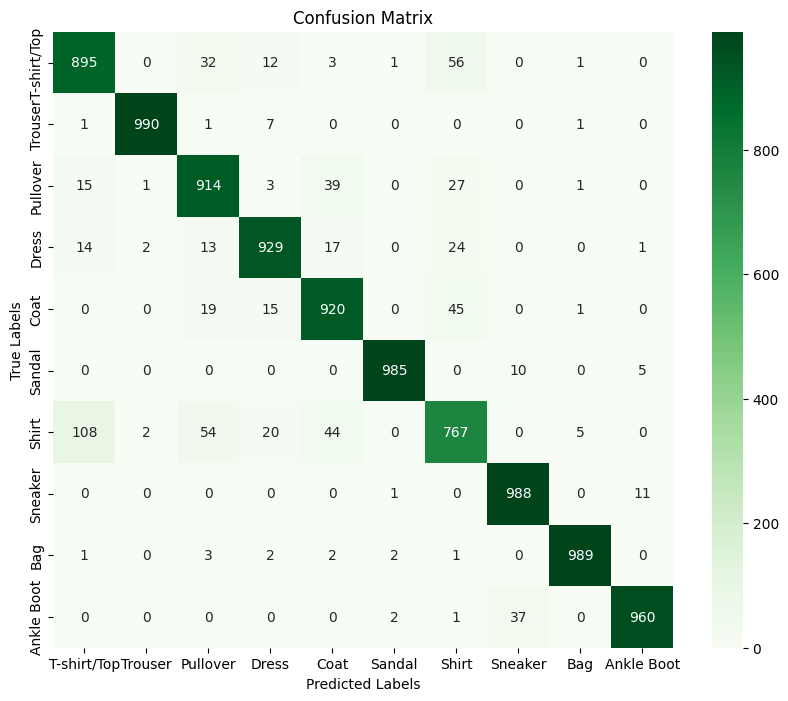

In [22]:
# Assuming you have `predictions_l` and `labels_l` containing the predicted labels and ground truth labels, respectively

# Create the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Alternatively, you can visualize the confusion matrix using a heatmap (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of class names
classes = ["T-shirt/Top", "Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle Boot"]  # Replace with your actual class names

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
torch.save(model, '/content/drive/MyDrive/resent_20.pt')